In [1]:
import numpy
import pickle
import pprint
pp = pprint.PrettyPrinter(indent=4)

import os
from os.path import join
import matplotlib
import matplotlib.ticker
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.ticker import MaxNLocator
import seaborn as sns
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{xfrac}'
#matplotlib.font_manager._rebuild() 
sns.set(font_scale=1.15)
sns.set_style("white")
sns.set_style("ticks")
plt.rc('font', family='serif')
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
benchmark_dir = '..'
subdir = '.'
#subdir = 'orbit-gram'
base_filename = 'benchmark-glogdet-9'
#base_filename = 'benchmark-plogdet-9-gram'
#base_filename = 'benchmark-plogdet-9-no-gram'
#base_filename = 'benchmark-glogdet-9-gram'
#base_filename = 'benchmark-glogdet-9-no-gram'

results_filename = join(benchmark_dir, 'pickle_results', subdir, base_filename + '.pickle')

with open(results_filename, 'rb') as file:
    benchmark_results = pickle.load(file)

results = benchmark_results['results']

logdet_lgcy_gen_gen = results['logdet_lgcy_gen_gen'].mean(axis=1)
logdet_lgcy_gen_ort = results['logdet_lgcy_gen_ort'].mean(axis=1)
logdet_lgcy_spd_gen = results['logdet_lgcy_spd_gen'].mean(axis=1)
logdet_lgcy_spd_ort = results['logdet_lgcy_spd_ort'].mean(axis=1)
logdet_proj_gen = results['logdet_proj_gen'].mean(axis=1)
logdet_proj_ort = results['logdet_proj_ort'].mean(axis=1)

wall_time_lgcy_gen_gen = results['wall_time_lgcy_gen_gen'].mean(axis=1)
wall_time_lgcy_gen_ort = results['wall_time_lgcy_gen_ort'].mean(axis=1)
wall_time_lgcy_spd_gen = results['wall_time_lgcy_spd_gen'].mean(axis=1)
wall_time_lgcy_spd_ort = results['wall_time_lgcy_spd_ort'].mean(axis=1)
wall_time_proj_gen = results['wall_time_proj_gen'].mean(axis=1)
wall_time_proj_ort = results['wall_time_proj_ort'].mean(axis=1)

proc_time_lgcy_gen_gen = results['proc_time_lgcy_gen_gen'].mean(axis=1)
proc_time_lgcy_gen_ort = results['proc_time_lgcy_gen_ort'].mean(axis=1)
proc_time_lgcy_spd_gen = results['proc_time_lgcy_spd_gen'].mean(axis=1)
proc_time_lgcy_spd_ort = results['proc_time_lgcy_spd_ort'].mean(axis=1)
proc_time_proj_gen = results['proc_time_proj_gen'].mean(axis=1)
proc_time_proj_ort = results['proc_time_proj_ort'].mean(axis=1)
proc_time_proj_ort_pre = results['proc_time_proj_ort_pre'].mean(axis=1)

flops_lgcy_gen_gen = results['flops_lgcy_gen_gen'].mean(axis=1)
flops_lgcy_gen_ort = results['flops_lgcy_gen_ort'].mean(axis=1)
flops_lgcy_spd_gen = results['flops_lgcy_spd_gen'].mean(axis=1)
flops_lgcy_spd_ort = results['flops_lgcy_spd_ort'].mean(axis=1)
flops_proj_gen = results['flops_proj_gen'].mean(axis=1)
flops_proj_ort = results['flops_proj_ort'].mean(axis=1)
flops_proj_ort_pre = results['flops_proj_ort_pre'].mean(axis=1)

devices = benchmark_results['devices']
config = benchmark_results['config']
detkit_config = benchmark_results['detkit_config']
ratios = config['ratios']
    
print('n: %d' %config['n'])
print('repeat: %d' %config['repeat'])
print('function: %s' %config['func'])
print('CPU: %s' %devices['cpu_name'])
print('num CPUs: %s' %devices['num_all_cpu_threads'])
print('use blas: %s' % config['use_blas'])
print('instructions per task: %0.3f' % devices['instructions_per_task'])
print('use_symmetry: %s' % detkit_config['use_symmetry'])
print('use_openmp: %s' % detkit_config['use_openmp'])
print('chunk_tasks: %s' % detkit_config['chunk_tasks'])
print('count_perf: %s' % detkit_config['count_perf'])

n: 512
repeat: 3
function: glogdet
CPU: Intel(R) Core(TM) i7-4770K CPU @ 3.50GHz
num CPUs: 8
use blas: False
instructions per task: 6.998
use_symmetry: True
use_openmp: False
chunk_tasks: True
count_perf: True


In [3]:
lgcy_gen_gen = {
    'logdet': logdet_lgcy_gen_gen,
    'wall_time': wall_time_lgcy_gen_gen,
    'proc_time': proc_time_lgcy_gen_gen,
    'flops': flops_lgcy_gen_gen,
    'color': r'gold',
    'markersize': 6,
    'marker': '.',
    'linestyle': '-',
    'label': r'LHS, $\boldsymbol{\Sigma}$ is not SPD, $\mathbf{X}$ is not orhtogonal',
    'order': 3,
}

lgcy_gen_ort = {
    'logdet': logdet_lgcy_gen_ort,
    'wall_time': wall_time_lgcy_gen_ort,
    'proc_time': proc_time_lgcy_gen_ort,
    'flops': flops_lgcy_gen_ort,
    'color': 'goldenrod',
    'markersize': 6,
    'marker': '.',
    'linestyle': '-',
    'label': r'LHS, $\boldsymbol{\Sigma}$ is not SPD, $\mathbf{X}$ is orhtogonal',
    'order': 3,
}

lgcy_spd_gen = {
    'logdet': logdet_lgcy_spd_gen,
    'wall_time': wall_time_lgcy_spd_gen,
    'proc_time': proc_time_lgcy_spd_gen,
    'flops': flops_lgcy_spd_gen,
    'color': 'yellowgreen',
    'markersize': 6,
    'marker': '.',
    'linestyle': '-',
    'label': r'LHS, $\boldsymbol{\Sigma}$ is SPD, $\mathbf{X}$ is not orhtogonal',
    'order': 3,
}

lgcy_spd_ort = {
    'logdet': logdet_lgcy_spd_ort,
    'wall_time': wall_time_lgcy_spd_ort,
    'proc_time': proc_time_lgcy_spd_ort,
    'flops': flops_lgcy_spd_ort,
    'color': 'darkolivegreen',
    'markersize': 6,
    'marker': '.',
    'linestyle': '-',
    'label': r'LHS, $\boldsymbol{\Sigma}$ is SPD, $\mathbf{X}$ is orhtogonal',
    'order': 3,
}

proj_gen = {
    'logdet': logdet_proj_gen,
    'wall_time': wall_time_proj_gen,
    'proc_time': proc_time_proj_gen,
    'flops': flops_proj_gen,
    'color': 'indianred',
    'markersize': 6,
    'marker': '.',
    'linestyle': '-',
    'label': r'RHS, $\mathbf{X}$ is not orthogonal',
    'order': 3,
}

proj_ort = {
    'logdet': logdet_proj_ort,
    'wall_time': wall_time_proj_ort,
    'proc_time': proc_time_proj_ort,
    'flops': flops_proj_ort,
    'color': 'maroon',
    'markersize': 6,
    'marker': '.',
    'linestyle': '-',
    'label': r'RHS, $\mathbf{X}$ is orthogonal',
    'order': 1,
}

In [4]:
# ===
# fit
# ===

def fit(x, y, order=1, num_outliers=0):
    """
    finds a in y = x**a
    """
    
    not_nan = numpy.logical_not(numpy.isnan(y))
    x = x[not_nan]
    y = y[not_nan]
    
    x_filt = numpy.copy(x)
    y_filt = numpy.copy(y)
    
    for i in range(num_outliers):
    
        coeff = numpy.polyfit(x_filt, y_filt, order)

        # Evaluate points using the model
        ym = numpy.polyval(coeff, x_filt)
        err = numpy.abs(y_filt - ym)

        err_indx = numpy.argsort(err)
        filt_indx = err_indx[:-1]

        # data without outliers
        x_filt = x_filt[filt_indx]
        y_filt = y_filt[filt_indx]
    
    coeff_filt = numpy.polyfit(x_filt, y_filt, order)
    
    # Interpolation
    #xi = numpy.linspace(x[0], x[-1])
    xi = numpy.linspace(0, 1)
    yi = numpy.polyval(coeff_filt, xi)
    
    return coeff_filt, xi, yi, x_filt, y_filt

# =======
# log fit
# =======

def log_fit(x, y, order=1):
    """
    finds a in y = x**a
    """
    
    not_nan = numpy.logical_not(numpy.isnan(y))
    x = x[not_nan]
    y = y[not_nan]
    
    log2_x = numpy.log2(x)
    log2_y = numpy.log2(y)
    
    coeff = numpy.polyfit(log2_x, log2_y, order)
    
    # Interpolation
    log2_xi = numpy.linspace(log2_x[0], log2_x[-1])
    log2_yi = numpy.polyval(coeff, log2_xi)
    
    xi = 2**(log2_xi)
    yi = 2**(log2_yi)
    
    return coeff, xi, yi

In [5]:
# =========
# save plot
# =========

def save_plot(
        plt,
        filename,
        save_dir=None,
        transparent_background=True,
        pdf=True,
        bbox_extra_artists=None,
        verbose=False):
    """
    Saves plot as svg format in the current working directory.

    :param plt: matplotlib.pyplot object for the plots.
    :type plt: matplotlib.pyplot

    :param filename: Name of the file without extension or directory name.
    :type filename: string

    :param transparent_background: Sets the background of svg file to be
        transparent.
    :type transparent_background: bool
    """

    # Write in the current working directory
    if save_dir is None:
        save_dir = os.getcwd()

    # Save plot in svg format
    filename_svg = filename + '.svg'
    filename_pdf = filename + '.pdf'
    save_fullname_svg = os.path.join(save_dir, filename_svg)
    save_fullname_pdf = os.path.join(save_dir, filename_pdf)

    plt.savefig(
            save_fullname_svg,
            transparent=transparent_background,
            bbox_inches='tight')
    if verbose:
        print('Plot saved to "%s".' % (save_fullname_svg))

    if pdf:
        plt.savefig(
                save_fullname_pdf,
                transparent=transparent_background,
                bbox_extra_artists=bbox_extra_artists, bbox_inches='tight')
        if verbose:
            print('Plot saved to "%s".' % (save_fullname_pdf))

In [6]:
# =========
# plot time
# =========

def plot_time(ax, data, title=None, variable='proc_time', ylim=None, num_outliers=0):
    """
    """
    
    # Settings
    start = 1
    stride = 1
    plot_filtered = True
    millisecond = 1e+3
    
    for i in range(len(data)):
        
        time_ = data[i][variable]
        
        if variable in ['proc_time', 'wall_time']:
            time = time_ * millisecond
        elif variable == 'flops':
            time = time_ / (config['n']**3)
        else:
            time = time_
            
        markersize = data[i]['markersize']
        marker = data[i]['marker']
        linestyle = data[i]['linestyle']
        order = data[i]['order']
        color = data[i]['color']
        label = data[i]['label']
        
        if num_outliers >= time.size:
            raise RuntimeError('"num_outliers" should be smaller than the data size.')
    
        coeff, xi, yi, ratios_filt, time_filt = fit(
            ratios[start:], time[start:], order=order, num_outliers=num_outliers)

        if plot_filtered:
            ratios_ = ratios_filt
            time_ = time_filt
        else:
            ratios_ = ratios
            time_ = time

        ax.plot(ratios_[start::stride], time_[start::stride], marker, color=color, markersize=markersize,
                label=label)

        if order == 1:
            fit_title = 'linear fit'
        elif order == 2:
            fit_title = 'quadratic fit'
        elif order == 3:
            fit_title = 'cubic fit'
        else:
            fit_title = 'curve fit'

        ax.plot(xi, yi, linestyle, color=color, markersize=markersize)

    ax.set_xlim([0, 1])
    ax.set_ylim(bottom=0, top=None)
    ax.set_xlabel(r'$m/n$')
    
    if variable == 'proc_time':
        ax.set_ylabel(r'Process Time (ms)')
    elif variable == 'wall_time':
        ax.set_ylabel(r'Elapsed Time (ms)')
    elif variable == 'flops':
        ax.set_ylabel(r'FLOPs/$n^3$')
        
    if title is not None:
        ax.set_title(title)
    ax.grid(axis='y')
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.legend(fontsize='x-small')

    plt.tight_layout()

# ========
# set ylim
# ========
    
def set_ylim(ax1, ax2):
    """
    Sets the ylim of two axes the same.
    """
    
    ymin_1, ymax_1 = ax1.get_ylim()
    ymin_2, ymax_2 = ax2.get_ylim()

    
    #ymin = numpy.min([ymin_1, ymin_2])
    #ymax = numpy.max([ymax_1, ymax_2])
    
    ymin = numpy.mean([ymin_1, ymin_2])
    ymax = numpy.mean([ymax_1, ymax_2])
    
    ax1.set_ylim([ymin, ymax])
    ax2.set_ylim([ymin, ymax])

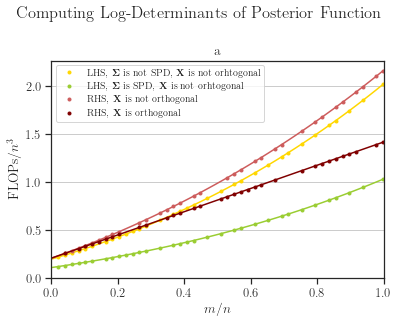

In [7]:
#ylim = [0.07, 0.53]
#ylim = [0.5, 8]
ylim = None
num_outliers = 15
#variable = 'proc_time'
variable = 'flops'

if config['func'] == 'glogdet':
    fig, ax = plt.subplots(figsize=(5.75, 4.6))
    plot_time(ax, [lgcy_gen_gen, lgcy_spd_gen, proj_gen, proj_ort], title='a', variable=variable, ylim=ylim,
              num_outliers=num_outliers)
    
elif config['func'] == 'plogdet':
    fig, ax = plt.subplots(figsize=(11, 13), ncols=2, nrows=3)
    
    # Not orthogonal (left) vs orthogonal (right)
    plot_time(ax[0][0], [lgcy_gen_gen, lgcy_spd_gen, proj_gen], title='a', variable=variable,
              ylim=ylim, num_outliers=num_outliers)
    plot_time(ax[0][1], [lgcy_gen_ort, lgcy_spd_ort, proj_ort], title='a', variable=variable,
              ylim=ylim, num_outliers=num_outliers)
    set_ylim(ax[0][0], ax[0][1])
    
    # Not PSD (left) vs PSD (right)
    plot_time(ax[1][0], [lgcy_gen_gen, lgcy_gen_ort, proj_gen, proj_ort], title='a', variable=variable,
              ylim=ylim, num_outliers=num_outliers)
    plot_time(ax[1][1], [lgcy_spd_gen, lgcy_spd_ort, proj_gen, proj_ort], title='a', variable=variable,
              ylim=ylim, num_outliers=num_outliers)
    set_ylim(ax[1][0], ax[1][1])
    
    # All plots
    plot_time(ax[2][0], [lgcy_gen_gen, lgcy_spd_gen, proj_gen,lgcy_gen_ort, lgcy_spd_ort, proj_ort], 
              title='a', variable=variable, ylim=ylim, num_outliers=num_outliers)
else:
    raise ValueError('func should be either "glogdet" or "plogdet".')

# plot_flops(ax[2][1], flops_per_second=1)

filename = 'proc_time'
benchmark_dir = '..'
save_dir = join(benchmark_dir, 'svg_plots')
save_plot(plt, filename, save_dir, transparent_background=True)
fig.suptitle('Computing Log-Determinants of Posterior Function')
fig.tight_layout()

plt.show()

In [8]:
# ==========
# Plot Flops
# ==========

def plot_flops(ax, plogdet=0, flops_per_second=1, plot_orth=True, plot_psd=True, title=None):
    """
    To obtain the actual flots, multiply by n**3. But since n is constant throuout the experiment,
    we plot flops per n**3.
    
    Scale adjusts the process time per flop.
    """
    
    #n = config['n']
    #scale = n**3 * flops_per_second
    scale = flops_per_second

    r = numpy.linspace(0, 1)
    
    # Flops for tasks
    tr = 0.5       # solving triangular system
    mm = 1.0        # matrix-matrix multiplication
    gr = 0.5        # set 0.5 for grammian matrix multiplication, set 1 for generic matrix multiplication
    ch = 1.0/3.0    # cholesky
    lu = 2.0/3.0    # lu
    
    #if config['func'] == 'glogdet':
    #    plogdet = 0
    #elif config['func'] == 'plogdet':
    #    plogdet = 1
    #else:
    #    raise ValueError('func should be either "glogdet" or "plogdet".')

    _lgcy_spd_gen_1 = scale * (ch +   tr*r + gr*mm*r**2 + ch*r**3 + plogdet*(gr*mm*r**2 + ch*r**3))
    _lgcy_spd_gen_2 = scale * (ch +   tr*r +    mm*r**2 + ch*r**3 + plogdet*(   mm*r**2 + ch*r**3))
    _lgcy_spd_ort_1 = scale * (ch +   tr*r + gr*mm*r**2 + ch*r**3)
    _lgcy_spd_ort_2 = scale * (ch +   tr*r +    mm*r**2 + ch*r**3)
    _lgcy_gen_gen   = scale * (lu + 2*tr*r +    mm*r**2 + lu*r**3 + plogdet*(gr*mm*r**2 + ch*r**3))
    _lgcy_gen_ort   = scale * (lu + 2*tr*r +    mm*r**2 + lu*r**3)
    _proj_ort       = scale * (lu + 2*mm*r)
    _proj_gen_1     = scale * (lu + 2*mm*r + tr*r**2 + gr*mm*r**2 + ch*r**3)
    _proj_gen_2     = scale * (lu + 2*mm*r + tr*r**2 +    mm*r**2 + ch*r**3)
    
    linestyle = '-'
    linewidth = 2

    if (plot_psd or plot_psd is None) and (not plot_orth or plot_orth is None):
        ax.plot(r, _lgcy_spd_gen_1, linestyle, linewidth=linewidth, color=lgcy_spd_gen['color'],
                label=r'LHS, $\boldsymbol{\Sigma}$ is PSD, $\mathbf{X}$ is not orthogonal, $\gamma = \sfrac{1}{2}$')
        ax.plot(r, _lgcy_spd_gen_2, '--', linewidth=linewidth, color=lgcy_spd_gen['color'],
                label=r'LHS, $\boldsymbol{\Sigma}$ is PSD, $\mathbf{X}$ is not orthogonal, $\gamma = 1$')
    
    if (plot_psd or plot_psd is None) and (plot_orth or plot_orth is None):
        ax.plot(r, _lgcy_spd_ort_1, linestyle, linewidth=linewidth, color=lgcy_spd_ort['color'],
                label=r'LHS, $\boldsymbol{\Sigma}$ is PSD, $\mathbf{X}$ is orthogonal, $\gamma = \sfrac{1}{2}$')
        ax.plot(r, _lgcy_spd_ort_2, '--', linewidth=linewidth, color=lgcy_spd_ort['color'],
                label=r'LHS, $\boldsymbol{\Sigma}$ is PSD, $\mathbf{X}$ is orthogonal, $\gamma = 1$')
    
    if (not plot_psd or plot_psd is None) and (not plot_orth or plot_orth is None):
        ax.plot(r, _lgcy_gen_gen, linestyle, linewidth=linewidth, color=lgcy_gen_gen['color'],
                label=r'LHS, $\boldsymbol{\Sigma}$ is not PSD, $\mathbf{X}$ is not orthogonal')
        
    if (not plot_psd or plot_psd is None) and (plot_orth or plot_orth is None):
        ax.plot(r, _lgcy_gen_ort, linestyle, linewidth=linewidth, color=lgcy_gen_ort['color'],
                label=r'LHS, $\boldsymbol{\Sigma}$ is not PSD, $\mathbf{X}$ is orthogonal')
    
    if (plot_orth or plot_orth is None):
        ax.plot(r, _proj_ort, linestyle, linewidth=linewidth, color=proj_ort['color'],
                label=r'RHS, $\mathbf{X}$ is orthogonal')
        
    if (not plot_orth or plot_orth is None):
        ax.plot(r, _proj_gen_1, linestyle, linewidth=linewidth, color=proj_gen['color'],
                label=r'RHS, $\mathbf{X}$ is not orthogonal, $\gamma = \sfrac{1}{2}$')
        ax.plot(r, _proj_gen_2, '--', linewidth=linewidth, color=proj_gen['color'],
                label=r'RHS, $\mathbf{X}$ is not orthogonal, $\gamma = 1$')
    
    ax.set_xlim([0, 1])
    #ax.set_ylim(bottom=0, top=None)
    ax.set_ylim(bottom=0, top=4)
    ax.set_xlabel(r'$m/n$')
    ax.set_ylabel(r'Flops / $n^3$')
    if title is not None:
        ax.set_title(title)
    ax.grid(axis='y')
    ax.legend(fontsize='x-small')
    
    plt.tight_layout()

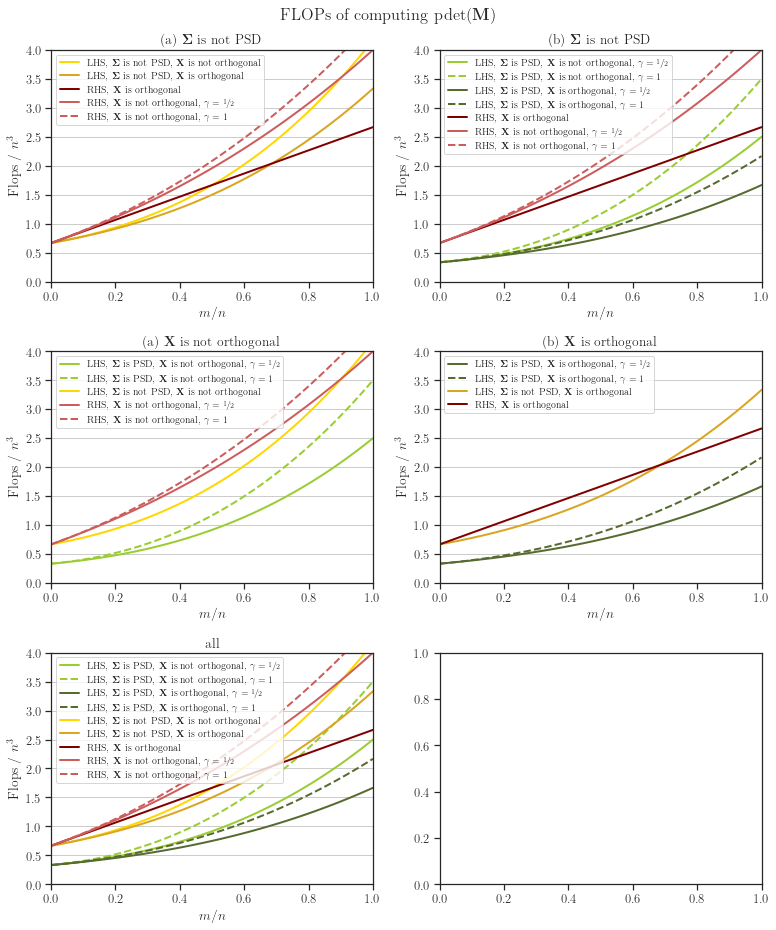

In [9]:
fig, ax = plt.subplots(figsize=(5.5*2, 4.4*3), ncols=2, nrows=3)

plot_flops(ax[0][0], plogdet=1, plot_psd=False,  plot_orth=None, title=r'(a) $\boldsymbol{\Sigma}$ is not PSD')
plot_flops(ax[0][1], plogdet=1, plot_psd=True, plot_orth=None, title=r'(b) $\boldsymbol{\Sigma}$ is not PSD')
plot_flops(ax[1][0], plogdet=1, plot_psd=None,  plot_orth=False, title=r'(a) $\mathbf{X}$ is not orthogonal')
plot_flops(ax[1][1], plogdet=1, plot_psd=None, plot_orth=True, title=r'(b) $\mathbf{X}$ is orthogonal')
plot_flops(ax[2][0], plogdet=1, plot_psd=None, plot_orth=None, title=r'all')

filename = 'flops'
benchmark_dir = '..'
save_dir = join(benchmark_dir, 'svg_plots')
save_plot(plt, filename, save_dir, transparent_background=True)
fig.suptitle(r'FLOPs of computing $\operatorname{pdet}(\mathbf{M})$')
fig.tight_layout()

plt.show()

In [10]:
# ===========
# plot logdet
# ===========


def plot_logdet(ax, data):
    """
    """
    
    start = 0
    plot_filtered = True
    
    for i in range(len(data)):
        
        logdet = data[i]['logdet']
        markersize = data[i]['markersize']
        marker = data[i]['marker']
        linestyle = data[i]['linestyle']
        order = data[i]['order']
        color = data[i]['color']
        label = data[i]['label']

        ax.plot(ratios[start:], logdet[start:], color=color, markersize=markersize, label=label)

    ax.set_xlim([0, 1])
    ax.set_xlabel(r'$m/n$')
    ax.set_ylabel(r'logdet')
    ax.legend(fontsize='x-small')

    plt.tight_layout()

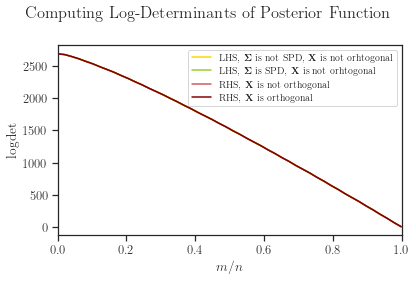

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))


if config['func'] == 'glogdet':
    plot_logdet(ax, [lgcy_gen_gen, lgcy_spd_gen, proj_gen, proj_ort])
    
elif config['func'] == 'plogdet':
    plot_logdet(ax, [lgcy_gen_gen, lgcy_spd_gen, proj_gen, lgcy_gen_ort, lgcy_spd_ort, proj_ort])

filename = 'logdet'
benchmark_dir = '..'
save_dir = join(benchmark_dir, 'svg_plots')
save_plot(plt, filename, save_dir, transparent_background=True)
fig.suptitle('Computing Log-Determinants of Posterior Function')
fig.tight_layout()

plt.show()